In [1]:
# importo librerias para graficar y leer data sets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
# traigo los archivos a trabajar
df_m = pd.read_csv(r"C:\Users\matia\OneDrive\Escritorio\EDA\Movies_dataset(ETL)_Final.csv")
df_c = pd.read_csv(r"C:\Users\matia\OneDrive\Escritorio\EDA\Credits(ETL)_Final.csv")

In [5]:
# chequeo nulos, runtime 246 nulos y original_language 11 nulos
df_m.isnull().sum()

Unnamed: 0                     0
belongs_to_collection          0
budget                         0
genres                         0
id                             0
original_language             11
popularity                     0
production_companies           0
release_date                   0
revenue                        0
runtime                      246
title                          0
vote_average                   0
vote_count                     0
release_year                   0
return                         0
production_countries_name      0
production_countries_iso       0
spoken_languages_name          0
spoken_languages_iso           0
dtype: int64

In [6]:
# chequeo nulos, no hay nulos
df_c.isnull().sum()

Unnamed: 0         0
id                 0
cast_character     0
cast_name          0
crew_department    0
crew_job           0
crew_name          0
dtype: int64

In [39]:
# veo valores faltantes, no uso value_counts(value = "[]") por problemas con mi version de pandas
print(f"""belongs_to_collection     Sin Dato: {sum(df_m['belongs_to_collection'] == 'Sin Dato')}         
budget                     0: {sum(df_m['budget'] == 0)}
genres                    []: {sum(df_m['genres'] == '[]')}
original_language         '': {sum(df_m['original_language'] == '')}
popularity                 0: {sum(df_m['popularity'] == 0.0)}
production_companies      []: {sum(df_m['production_companies'] == '[]')}
release_date              '': {sum(df_m['release_date'] == '')}
revenue                    0: {sum(df_m['revenue'] == 0.0)}
runtime                    0: {sum(df_m['runtime'] == 0.0)}
title                     '': {sum(df_m['title'] == '')}
vote_average               0: {sum(df_m['vote_average'] == 0.0)}
vote_count                 0: {sum(df_m['vote_count'] == 0.0)}
release_year              '': {sum(df_m['release_year'] == '')}
return                     0: {sum(df_m['return'] == 0.0)}
production_countries_name []: {sum(df_m['production_countries_name'] == '[]')}
production_countries_iso  []: {sum(df_m['production_countries_iso'] == '[]')}
spoken_languages_name     []: {sum(df_m['spoken_languages_name'] == '[]')}
spoken_languages_iso      []: {sum(df_m['spoken_languages_iso'] == '[]')}""")

belongs_to_collection     Sin Dato: 40875         
budget                     0: 36478
genres                    []: 2384
original_language         '': 0
popularity                 0: 40
production_companies      []: 11793
release_date              '': 0
revenue                    0: 37958
runtime                    0: 1535
title                     '': 0
vote_average               0: 2946
vote_count                 0: 2848
release_year              '': 0
return                     0: 39982
production_countries_name []: 6209
production_countries_iso  []: 6209
spoken_languages_name     []: 3766
spoken_languages_iso      []: 3766


In [42]:
# veo valores faltantes
print(f"""
cast_character         []: {sum(df_c['cast_character'] == '[]')}
cast_name              []: {sum(df_c['cast_name'] == '[]')}
crew_department        []: {sum(df_c['crew_department'] == '[]')}
crew_job               []: {sum(df_c['crew_job'] == '[]')}
crew_name              []: {sum(df_c['crew_name'] == '[]')}""")


cast_character         []: 575
cast_name              []: 575
crew_department        []: 169
crew_job               []: 169
crew_name              []: 169


In [50]:
# veo filas duplicadas, no hay filas duplicadas (en el ETL se quitaron)
df_m.duplicated().sum()

0

In [52]:
# veo filas duplicadas, no hay filas duplicadas (en el ETL se quitaron)
df_c.duplicated().sum()

0

In [53]:
# reviso el tipo de dato de cada columna
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45363 entries, 0 to 45362
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 45363 non-null  int64  
 1   belongs_to_collection      45363 non-null  object 
 2   budget                     45363 non-null  float64
 3   genres                     45363 non-null  object 
 4   id                         45363 non-null  int64  
 5   original_language          45352 non-null  object 
 6   popularity                 45363 non-null  float64
 7   production_companies       45363 non-null  object 
 8   release_date               45363 non-null  object 
 9   revenue                    45363 non-null  float64
 10  runtime                    45117 non-null  float64
 11  title                      45363 non-null  object 
 12  vote_average               45363 non-null  float64
 13  vote_count                 45363 non-null  flo

In [56]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       20000 non-null  int64 
 1   id               20000 non-null  int64 
 2   cast_character   20000 non-null  object
 3   cast_name        20000 non-null  object
 4   crew_department  20000 non-null  object
 5   crew_job         20000 non-null  object
 6   crew_name        20000 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Costo y Recaudacion')

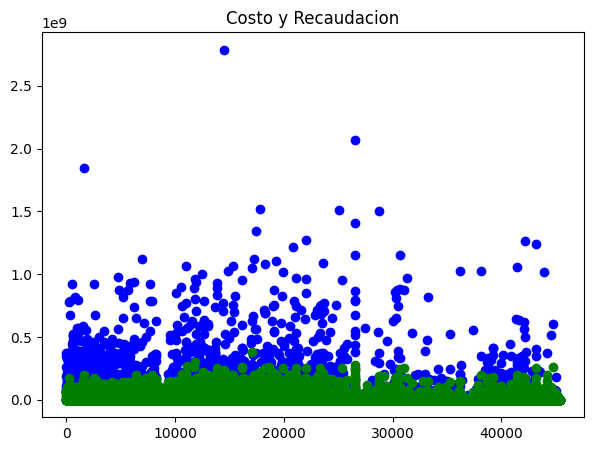

In [69]:
# veo estadisticas del data set de movies que tiene datos utiles para el modelo de ML 
# tanto en budget como en revenue hay muchos valores faltantes y pare que hay tres outliers en revenue
plt.figure(figsize = (7,5))
plt.plot(df_m["revenue"], "bo")
plt.plot(df_m["budget"],"go")
plt.title("Costo y Recaudacion")

In [88]:
# busco los outliers
df_m["revenue"].sort_values(ascending = False,inplace = False).head(5)

14541    2.787965e+09
26515    2.068224e+09
1636     1.845034e+09
17802    1.519558e+09
25044    1.513529e+09
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Conteo de Votos')

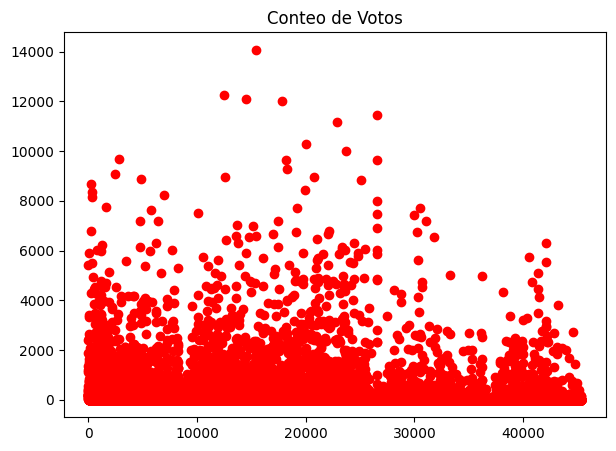

In [91]:
# veo vote_count, para el tamaño del data set tiene pocos valores faltantes
# parece haber 4 o mas outliers
plt.figure(figsize = (7,5))
plt.plot(df_m["vote_count"], "ro")
plt.title("Conteo de Votos")

In [90]:
# busco los outliers
df_m["vote_count"].sort_values(ascending = False,inplace = False).head(8)

15469    14075.0
12473    12269.0
14541    12114.0
17802    12000.0
26524    11444.0
22844    11187.0
20028    10297.0
23717    10014.0
Name: vote_count, dtype: float64

Text(0.5, 1.0, 'Popularidad')

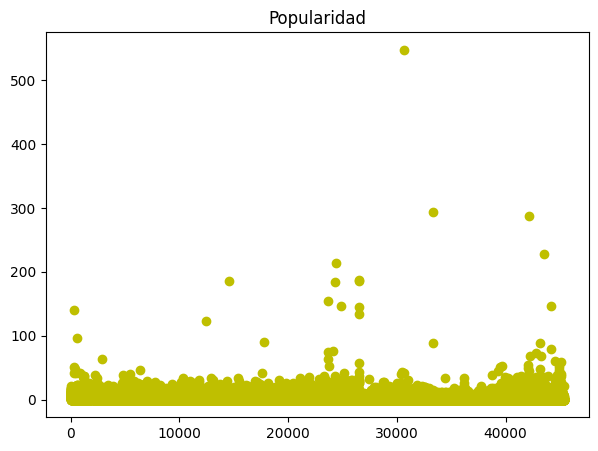

In [96]:
# veo popularidad y parece tener bastantes outliers
plt.figure(figsize = (7,5))
plt.plot(df_m["popularity"], "yo")
plt.title("Popularidad")

In [99]:
df_m["popularity"].sort_values(ascending = False,inplace = False).head(20)

30653    547.488298
33304    294.337037
42138    287.253654
43554    228.032744
24417    213.849907
26524    187.860492
26526    185.330992
14541    185.070892
24313    183.870374
23639    154.801009
24833    147.098006
44180    146.161786
26527    145.882135
292      140.950236
26520    133.827820
12473    123.167259
536       96.272374
17802     89.887648
43198     88.561239
33308     88.439243
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Retorno')

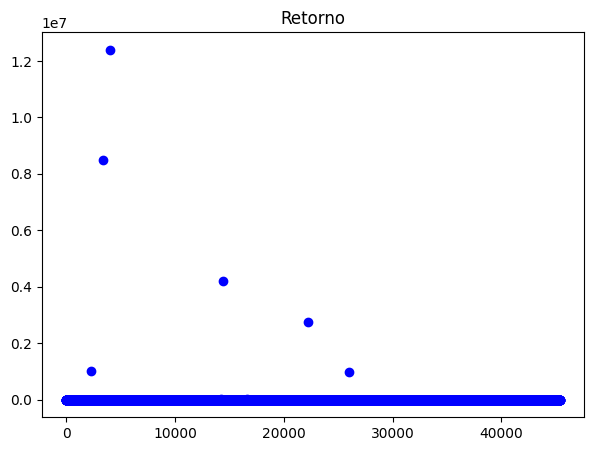

In [100]:
# veo el retorno
# como en budget y revenue hay muy pocos datos, return es una columna calculada en funcion de budget y revenue, 
# tambien faltan muchos datos (39982 de 45363, el 88,13% falta aprox.) 
plt.figure(figsize = (7,5))
plt.plot(df_m["return"], "bo")
plt.title("Retorno")

In [23]:
# preparo la columna de titulos, combierto la series en un str
texto = df_m["title"].str.lower().str.join("").str.cat(sep=" ")

In [30]:
# creo la nube y saco las palabras que no aportan informacion
wordcloud = WordCloud(stopwords = ["The", "and", "in", "collection","of","a", "i","to","for","on","my"], background_color = "white").generate(texto)

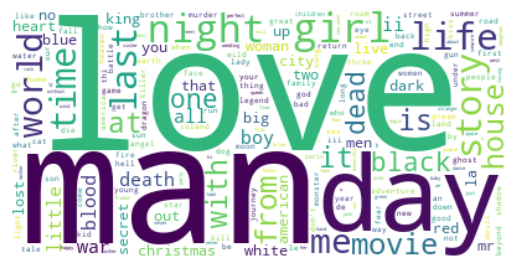

In [31]:
# grafico la nube
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()